In [ ]:
### Populations Analysis ###

In [ ]:
### Mild Selection ###

In [5]:
### Load Libraries ###

library('dplyr')
library('tidyr')
library('ggplot2')
library('tidyverse')
library(reshape2)
library(ggrepel)
library(ggthemes)
library(hrbrthemes)

In [6]:
## Load high frequency mutations: Mild selection 

MS_allmn <- read.csv('../../MSallmn.csv')

ps <- unique(MS_allmn) %>% 
group_by(position) %>% 
summarise(s=sum(value))

MS_allmn <- merge(MS_allmn,ps,by='position')

In [8]:
### Color vector ###
blues <- c('#2c7db8','#317fba','#3782bb','#3c85bd','#4088bf','#458ac1',
'#498dc3','#4e90c5','#5293c7','#5696c9','#5a99ca','#5e9bcc','#629ece','#66a1d0',
'#6aa4d2','#6ea7d4','#72aad6','#76add8','#7ab0d9','#7eb2db','#82b5dd','#86b8df',
'#8abbe1','#8ebee3','#91c1e5','#95c4e7','#99c7e9','#9dcaeb','#a1cdec','#1868d6','#176ad7','#166dd8','#156fd9',
'#1571d9','#1573da','#1675db','#1f77b4','#267ab6',
'#a5d0ee','#a9d2f0','#add5f2','#b1d8f4','#b5dbf6','#b9def8','#bde1fa','#c1e4fc','#c5e7fe')

Warning message:
“Ignoring unknown aesthetics: fill”
Warning message:
“Removed 162 rows containing missing values (geom_text_repel).”


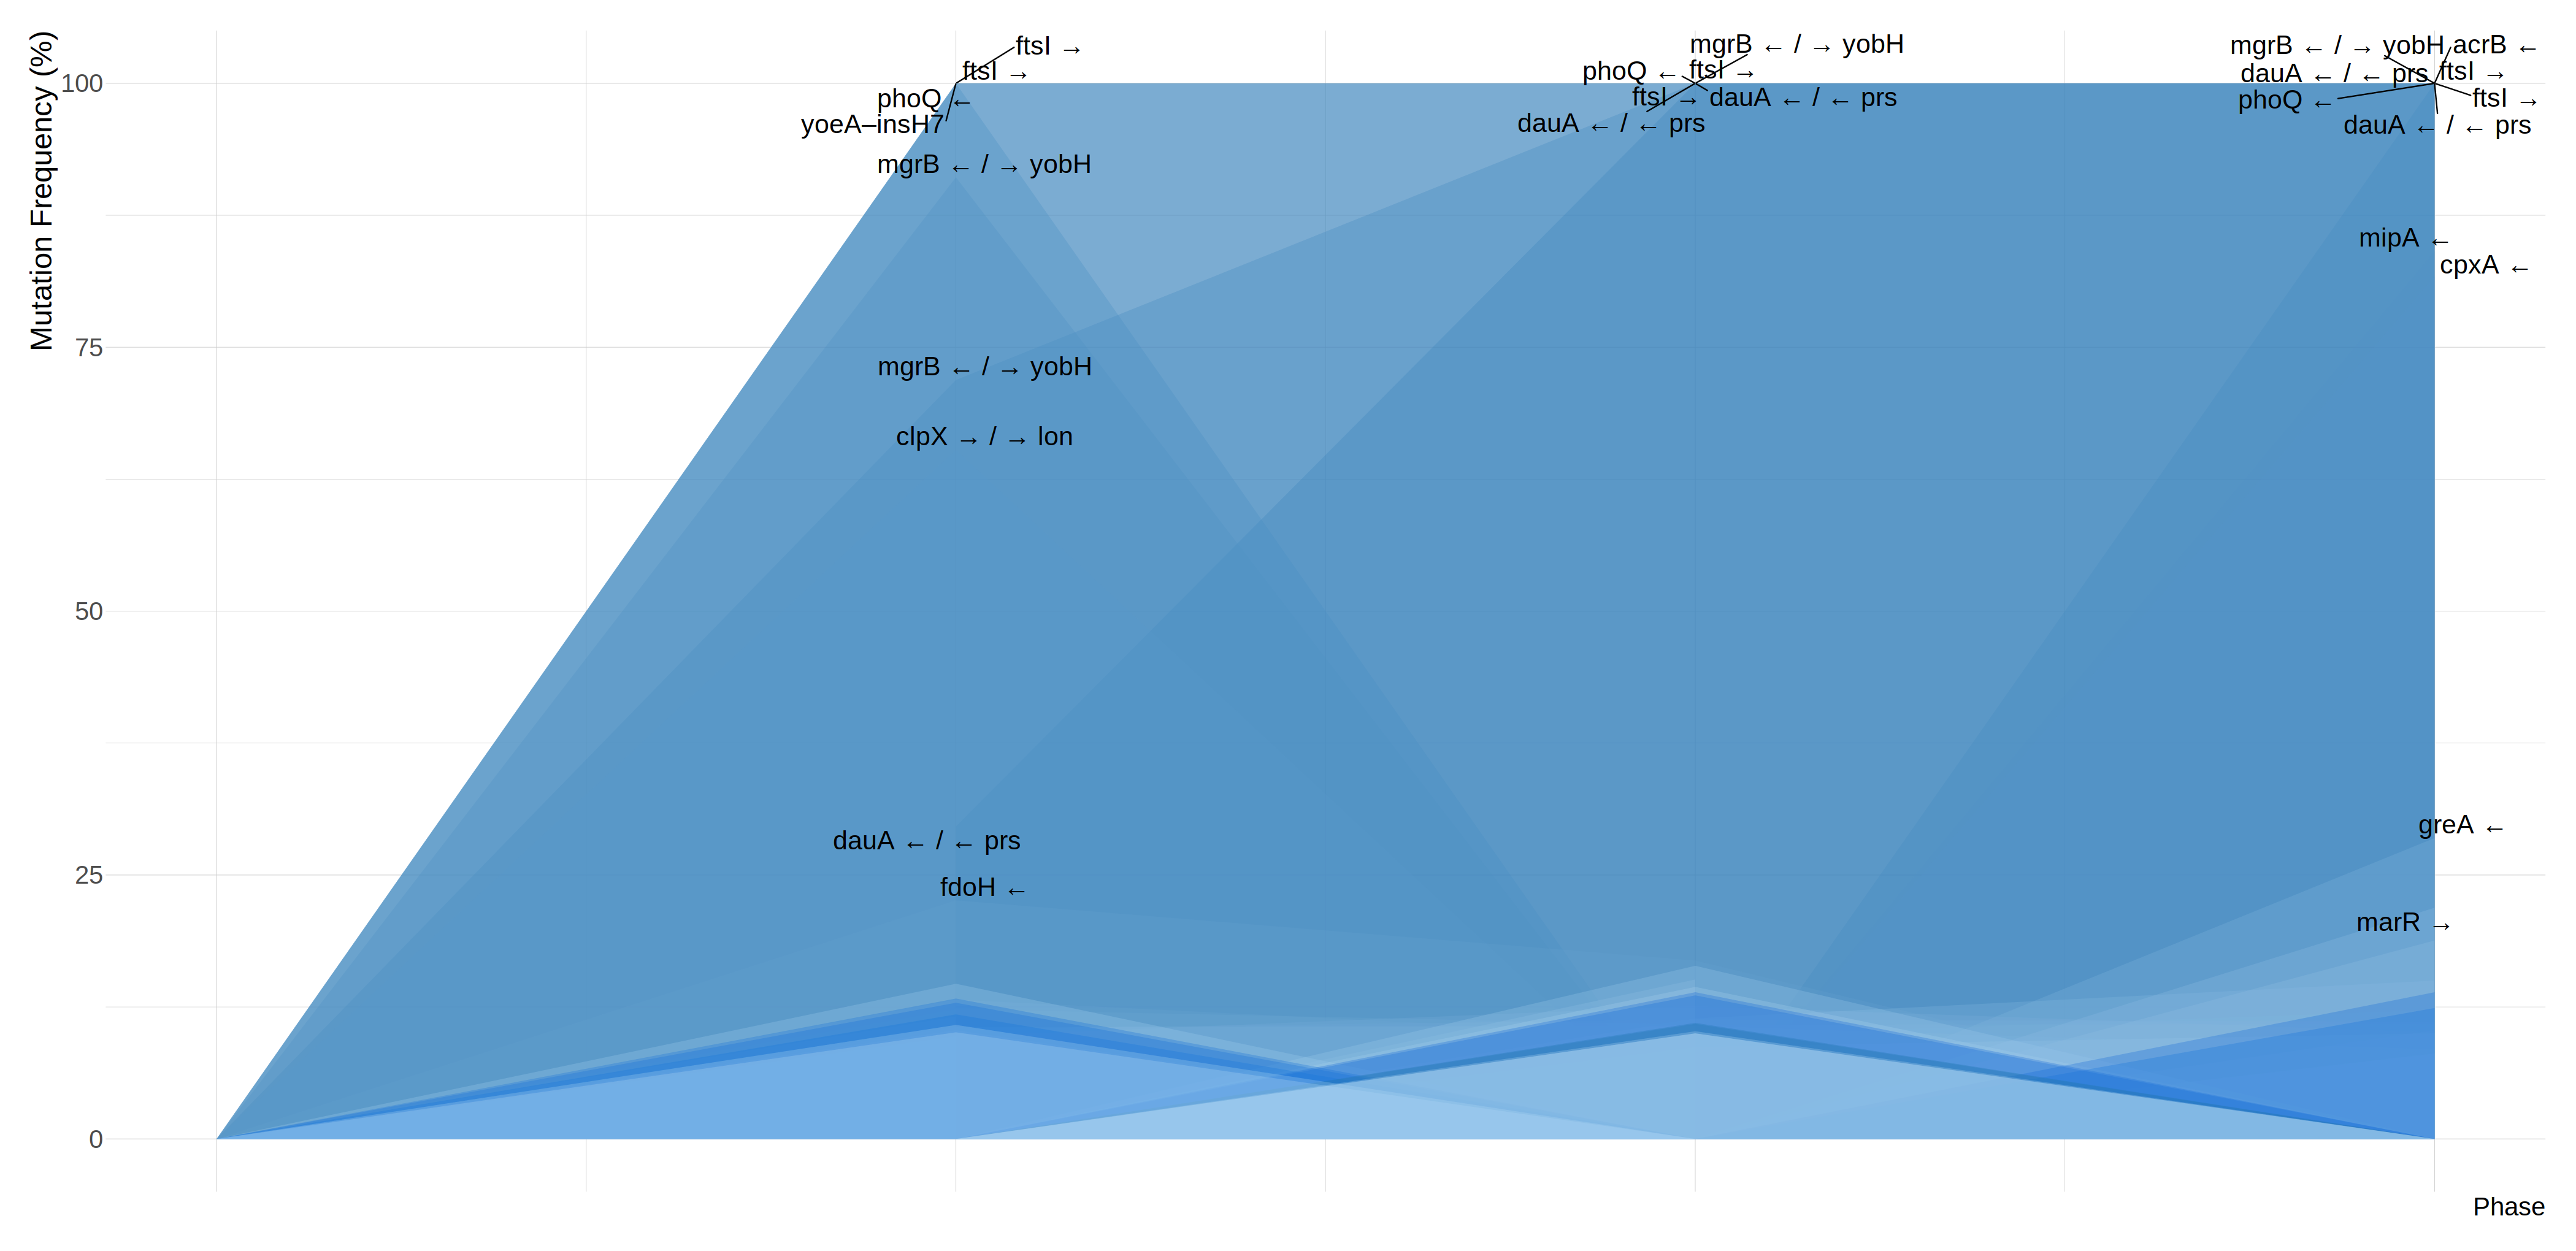

In [16]:
options(repr.plot.width = 35, repr.plot.height = 17)

mild_sel_phase_plot <- MS_allmn %>%   
# mutate(label = if_else(variable == max(variable), as.character(gene), NA_character_)) %>%
mutate(label = if_else(value > 20, as.character(gene), NA_character_)) %>%

ggplot(aes(x=variable, y=value)) +
#   geom_line( size=2) +
geom_area(aes( fill=reorder(position,desc(s.x))),alpha=0.3, position = 'identity') +
  theme_ipsum() +xlab('Phase')+ylab('Mutation Frequency (%)')+
scale_fill_manual(values = blues)+
theme(legend.position ='none')+
theme(axis.title.x = element_text(size=25),
      axis.title.y = element_text(size=29),
      axis.text.x = element_blank(),
      axis.text.y = element_text(size=25),
      legend.position ='none')+
ggrepel::geom_text_repel(aes(label=label,fill=reorder(position,desc(s.x))),size=9,max.overlaps = Inf)
# ,fill=reorder(position,desc(s.x)), hjust=0.6,vjust =1,xlim=c(0,4),ylim=c(0,100),alpha=0.9, size=9,max.overlaps = Inf,
#                           segment.color = 'black')
mild_sel_phase_plot
# ggsave('MildSelectionPhase.png', dpi = 450,device = 'png', bg = 'white',width = 25,height = 10)

In [ ]:
### Strong Selection

In [27]:
SS_allmn <- read.csv('../../SS_allmn.csv')

In [28]:
SS_allmn$gene <- as.factor(SS_allmn$gene)
SS_allmn$variable<- as.factor(as.character(SS_allmn$variable))
ps <- unique(SS_allmn) %>% 
group_by(position) %>% 
summarise(s=sum(value))

SS_allmn <- merge(SS_allmn,ps,by='position')
SS_allmn$variable <- as.numeric(as.character(SS_allmn$variable))
# SS_allmn

In [29]:
### color vector
orange <- c('#ff7f0e','#ff8313','#fe8717','#fe8c1b','#fd8f1f','#fd9324','#fc9728',
'#fc9b2c','#fb9f30','#fba234','#fba639','#faa93d','#faad41','#fab046','#f9b34a',
'#f9b74e','#f9ba53','#f8bd57','#f8c05c','#f8c461','#f8c765','#f8ca6a','#f8cd6f',
'#f8d074','#f8d378','#f8d67d','#f8d882','#f8db87','#f8de8c','#f8e191','#f8e496',
'#f9e69c','#f9e9a1','#faeca6','#faeeab','#fbf1b0','#fbf3b5','#fcf6bb','#fdf9c0',
'#fefbc5'
)  


[1] -0.5  1.5  2.5  0.5

Warning message:
“Removed 108 rows containing missing values (geom_label_repel).”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


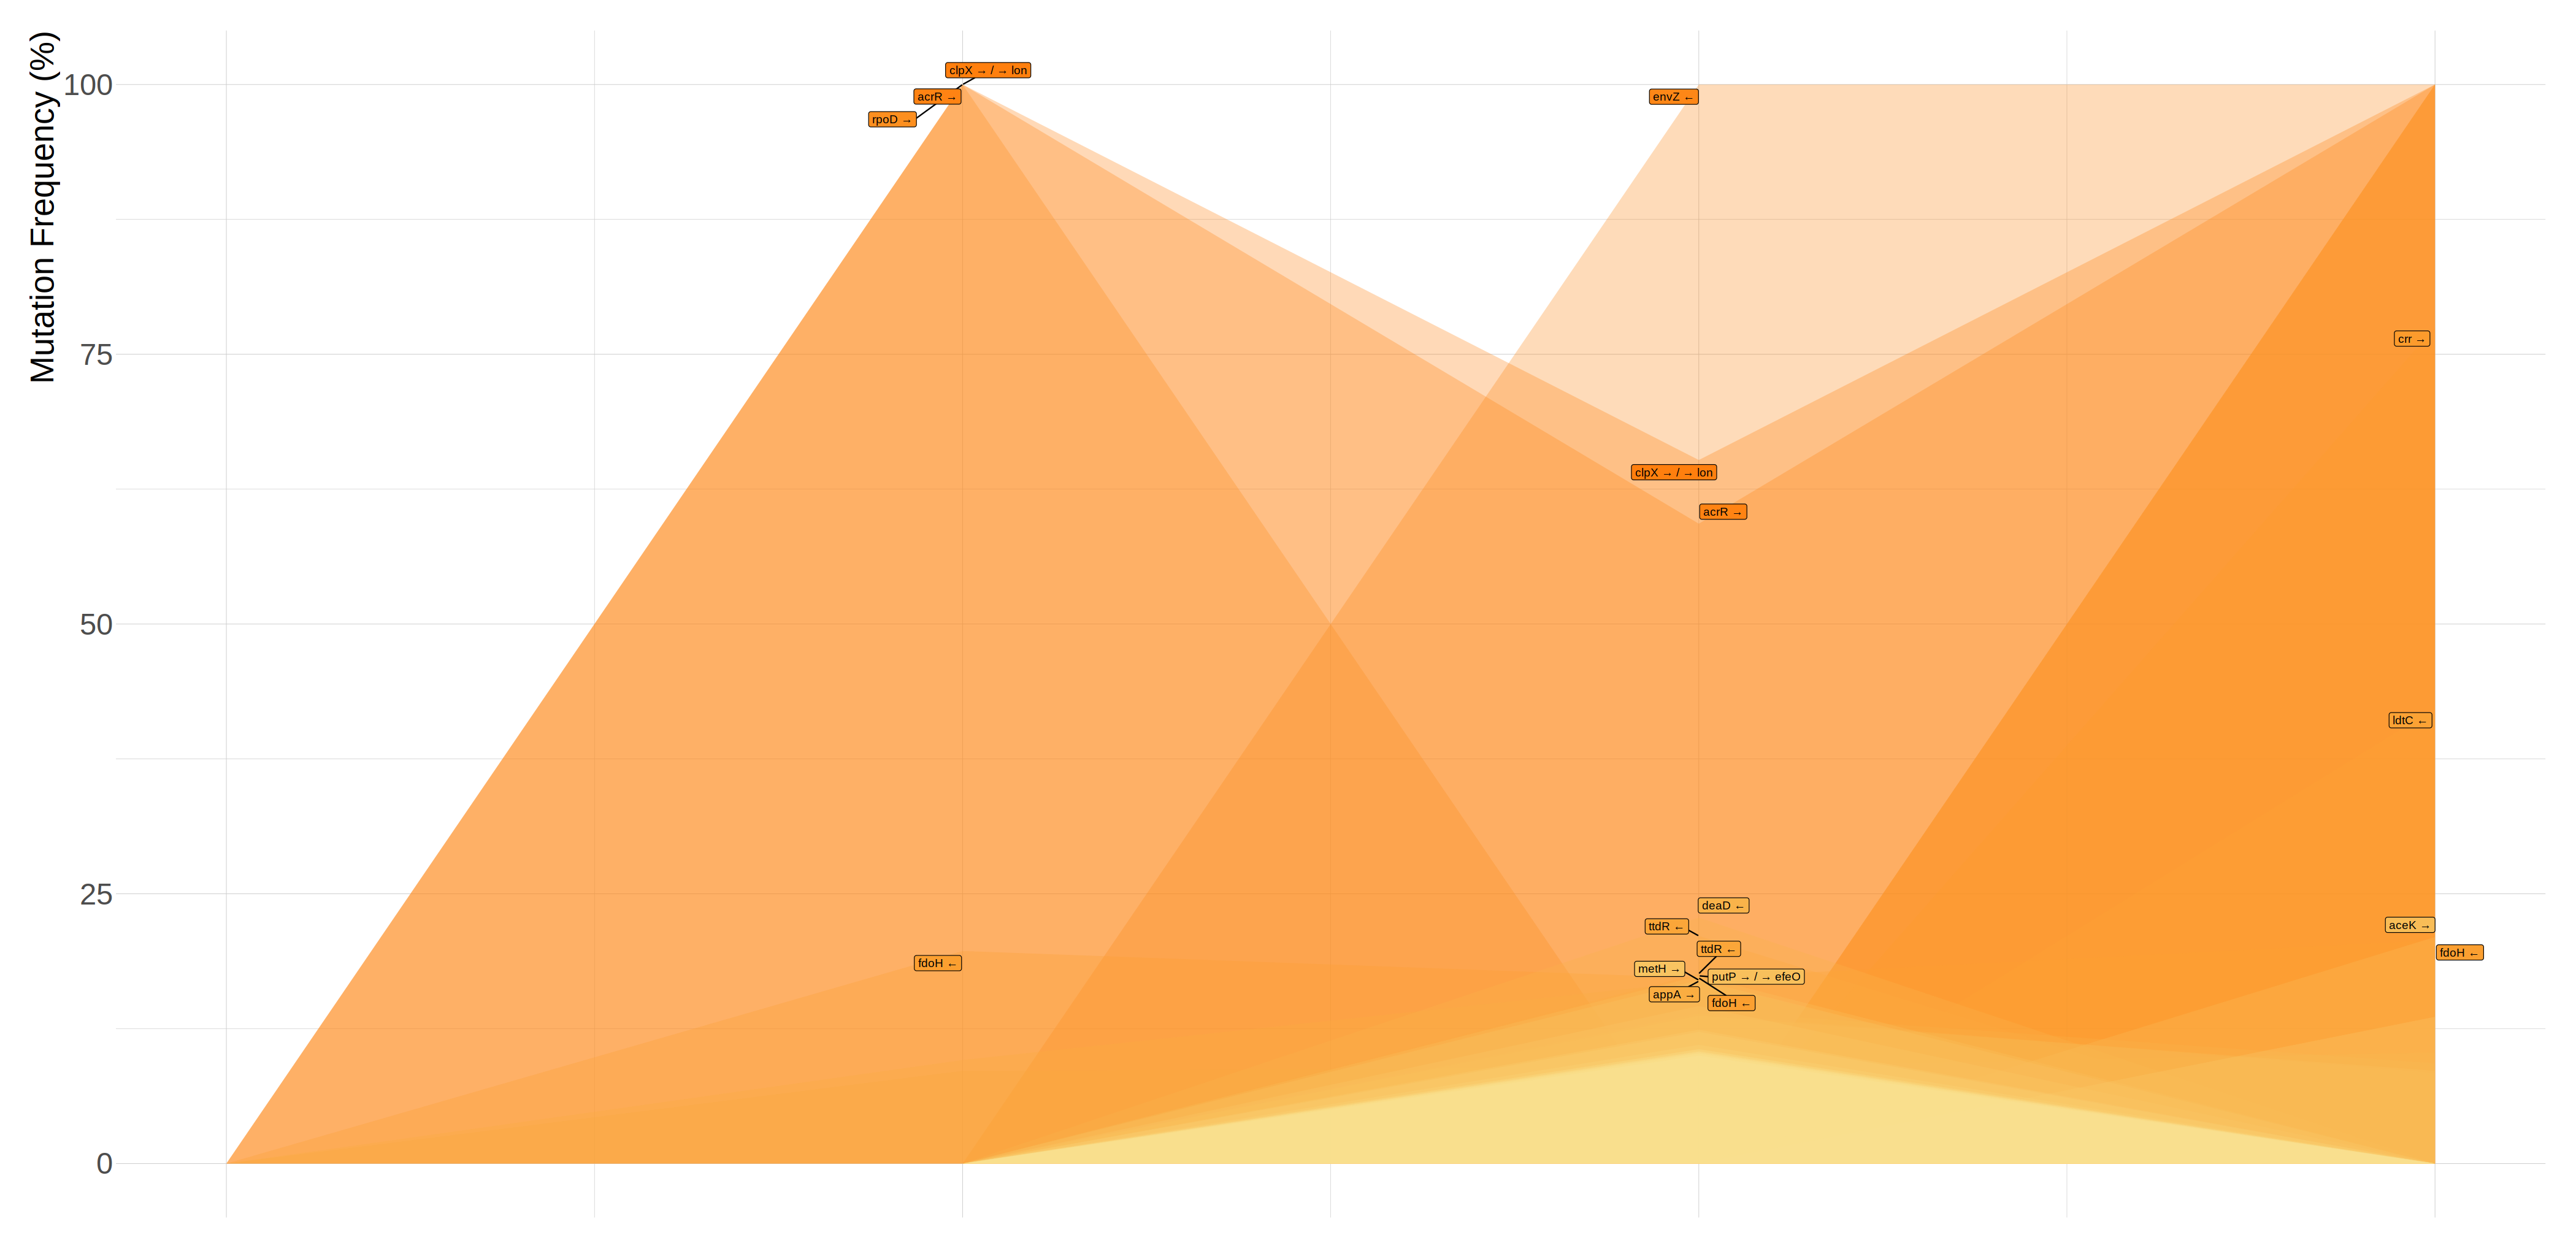

In [32]:
SS_allmn$variable <- as.integer(as.factor(SS_allmn$variable))

x_tick <- head(unique(SS_allmn$variable)) - 1.5
x_tick
len <- length(x_tick)

strong_sel_phase_plot2  <- SS_allmn %>%   
# mutate(label = if_else(variable == max(variable), as.character(gene), NA_character_)) %>%
mutate(label = if_else(value >15, as.character(gene), NA_character_)) %>%

ggplot(aes(x=variable, y=value)) +
#   geom_line( size=2) +
geom_area(aes( fill=reorder(position,desc(s))),alpha=0.3, position = 'identity') +
  theme_ipsum() +ylab('Mutation Frequency (%)')+xlab('Phase')+
scale_fill_manual(values = orange)+
theme(axis.title.x = element_blank(),
      axis.title.y = element_text(size=32),
      axis.text.x = element_blank(),
      axis.text.y = element_text(size=29),
      legend.position ='none')+
ggrepel::geom_label_repel(aes(label=label,fill=reorder(position,desc(s))))
#                           hjust=1.3,vjust = -0.2,xlim=c(0,4),ylim=c(0,100),alpha=0.9, size=10,max.overlaps = Inf,
#                           segment.color = 'transparent')
strong_sel_phase_plot2 
# ggsave('StrongSelectionPhase2.png', dpi = 450,device = 'png', bg = 'white',width = 25,height = 10)